# JUGANDO CON UN INTERESANTE DATASET

## Practicando temas como:

1. Pandas.
2. Importar data en chunks debido a su tamaño.
3. Generadores, iteradores, funciones y list comprehensions.
4. Procesar chunks para configurar un dataset útil para analisis.
5. Seaborn
6. Pre-procesing, cleaning, imputation.


## Fuente de datos: https://datacatalog.worldbank.org/dataset/world-development-indicators


#### The primary World Bank collection of development indicators, compiled from officially-recognized international sources. It presents the most current and accurate global development data available, and includes national, regional and global estimates

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Seleccionar ambiente de trabajo.

os.chdir('E:\Backup Sergio IPROCOM\Documentos\SMARIN\SAMP\MaestriaAnalitica\BLOG ANALITICA\Entrenando con Datasets\WDI')

In [3]:
# Extraemos solo los nombres de los indicadores disponibles en el dataset

#b = np.loadtxt(r'WDIData.csv', dtype=str, skiprows=1, usecols=(2,))

b = pd.read_csv(r'WDIData.csv', usecols=[2], delimiter= ';',error_bad_lines = False,encoding="ISO-8859-1")


In [4]:
print(b)
print(type(b))

                                           Indicator Name
0       2005 PPP conversion factor, GDP (LCU per inter...
1       2005 PPP conversion factor, private consumptio...
2       Access to clean fuels and technologies for coo...
3                 Access to electricity (% of population)
4       Access to electricity, rural (% of rural popul...
5       Access to electricity, urban (% of urban popul...
6       Account ownership at a financial institution o...
7       Account ownership at a financial institution o...
8       Account ownership at a financial institution o...
9       Account ownership at a financial institution o...
10      Account ownership at a financial institution o...
11      Account ownership at a financial institution o...
12      Account ownership at a financial institution o...
13      Account ownership at a financial institution o...
14      Account ownership at a financial institution o...
15      Adequacy of social insurance programs (% of to...
16      Adequa

In [38]:
# Se genera lista con solo los indicadores que mide el dataset

indicadores = b.iloc[:,0]
indicadores = indicadores.unique()

In [6]:
# Vamos a obtener una lista de solo el tema que queremos analizar.

tema = 'Population'

buscar_temas = [[x] for x in indicadores if tema in x]

buscar_temas

[['Population ages 0-14 (% of total)'],
 ['Population ages 0-14, female'],
 ['Population ages 0-14, female (% of total)'],
 ['Population ages 0-14, male'],
 ['Population ages 0-14, male (% of total)'],
 ['Population ages 0-14, total'],
 ['Population ages 0-4, female (% of female population)'],
 ['Population ages 0-4, male (% of male population)'],
 ['Population ages 10-14, female (% of female population)'],
 ['Population ages 10-14, male (% of male population)'],
 ['Population ages 15-19, female (% of female population)'],
 ['Population ages 15-19, male (% of male population)'],
 ['Population ages 15-64 (% of total)'],
 ['Population ages 15-64, female'],
 ['Population ages 15-64, female (% of total)'],
 ['Population ages 15-64, male'],
 ['Population ages 15-64, male (% of total)'],
 ['Population ages 15-64, total'],
 ['Population ages 20-24, female (% of female population)'],
 ['Population ages 20-24, male (% of male population)'],
 ['Population ages 25-29, female (% of female populati

## Generación de la función que leera el dataset en chunks y que traerá solo la información del país que queremos analizar.

In [7]:
# Definir la función plot_pop()
def plot_pop(filename, country_code):

    # Inicializar el generador que leera chunks. como resultado no es un Dataframe es un objeto de iteración.
    urb_pop_reader = pd.read_csv(fn, chunksize=100,delimiter=';',error_bad_lines = False, warn_bad_lines= False,encoding="ISO-8859-1")
    
    data = pd.DataFrame()
    
    # Iterar sobre cada chunk y extraer solo la info del país que se quiere evaluar.
    for df_urb_pop in urb_pop_reader:
        df_pop_ceb = df_urb_pop[df_urb_pop['Country Code'] == country_code]
        data = data.append(df_pop_ceb)
    
    # Retorna la data del país y seleccionado.
    return(data)

In [8]:
# Establecer el archivo que leerá.
fn = 'WDIData.csv'

# Llamar la función.
df_analisis = plot_pop(fn,'COL')

In [9]:
# Eliminar las columnas vacias.
df_analisis=df_analisis.drop(columns=['Unnamed: 72','2017'])

In [10]:
# Reemplazar NaN por 0 si existiesen.
df_analisis=df_analisis.fillna('0')

In [11]:
# Selección del índice que se quiere analizar.
indice = 'Population, total'

In [12]:
# Generar DataFrame con la información correspondiente al índice que se quiere analizar.
datos = df_analisis.loc[df_analisis['Indicator Name'] == indice]
datos

,Country Name,Country Code,Indicator Name,Indicator Code,1950,1951,1952,1953,1954,1955,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
142380,Colombia,COL,"Population, total",SP.POP.TOTL,12340899,12699952,13064689,13438645,13824726,14225204,...,44374572,44901544,45416181,45918097,46406646,46881475,47342981,47791911,48228697,48653419


In [16]:
# Tranponer y resetar el index para que la fecha queede como una columna.

data_transp = pd.DataFrame(datos.transpose())
data_transp = data_transp.reset_index()

In [17]:
# Añadir títulos de las columnas.
data_transp.columns = ['año','Población_Total']
data_transp

,año,Población_Total
0,Country Name,Colombia
1,Country Code,COL
2,Indicator Name,"Population, total"
3,Indicator Code,SP.POP.TOTL
4,1950,12340899
5,1951,12699952
6,1952,13064689
7,1953,13438645
8,1954,13824726
9,1955,14225204


In [18]:
# Eliminar las filas que no se usarán en el análisis.
data_transp = data_transp.drop([0,1,2,3])

In [20]:
data_transp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 4 to 70
Data columns (total 2 columns):
año                67 non-null object
Población_Total    67 non-null object
dtypes: object(2)
memory usage: 1.6+ KB


In [21]:
# Cambiar el type de Población_total para poder graficarlo correctamente.

data_transp[['Población_Total']] = data_transp[['Población_Total']].astype(str).astype(int)

In [22]:
data_transp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 4 to 70
Data columns (total 2 columns):
año                67 non-null object
Población_Total    67 non-null int32
dtypes: int32(1), object(1)
memory usage: 1.3+ KB


In [23]:
# Generar la columna 'Crecimiento' calculando la diferencia entre un año y otro.
data_transp['Crecimiento'] = data_transp['Población_Total'].diff()

In [24]:
data_transp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 4 to 70
Data columns (total 3 columns):
año                67 non-null object
Población_Total    67 non-null int32
Crecimiento        66 non-null float64
dtypes: float64(1), int32(1), object(1)
memory usage: 1.8+ KB


Text(0.5,1,'Tasa de crecimiento anual Población Total')

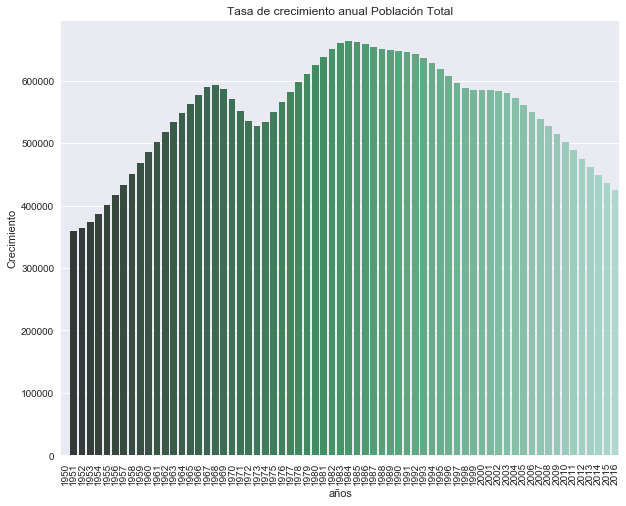

In [35]:
sns.set(style="darkgrid", palette='deep',context="notebook", color_codes=True)
f, (ax2) = plt.subplots(1, 1, figsize=(10, 8), sharex=True)
plot = sns.barplot(data_transp['año'],data_transp['Crecimiento'], palette="BuGn_d", ax=ax2)
plot.set_xticklabels(data_transp['año'],rotation=90)
ax2.set_ylabel("Crecimiento")
ax2.set_xlabel("años")
ax2.set_title('Tasa de crecimiento anual Población Total')

Text(0.5,1,'Población Total anual')

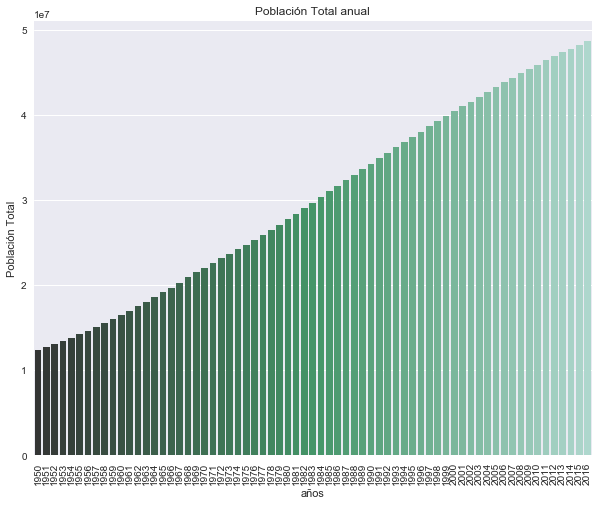

In [37]:
sns.set(style="darkgrid", palette='deep',context="notebook", color_codes=True)
f, (ax1) = plt.subplots(1, 1, figsize=(10, 8), sharex=True)
plot = sns.barplot(data_transp['año'],data_transp['Población_Total'], palette="BuGn_d", ax=ax1)
plot.set_xticklabels(data_transp['año'],rotation=90)
ax1.set_ylabel("Población Total")
ax1.set_xlabel("años")
ax1.set_title('Población Total anual')